# Optimizers

Optimizers are a key part of the algorithms that train neural networks. The original optimizer is gradient descent, and the concept of gradient descent is effectively the foundation of all optmizers (as well as fundamental to machine learning). Unlike activation functions, optimzers are a part of training the network, not a component of the network itself. In fact, the same optimizers that are used in Deep Neural Networks are used in a variety of other machine learning models as well.

Optimizers, and the parameters of optimizers, can have profound impacts on training. Similar to activation functions, there isn't a "one true optimizer". Different optimizers might perform better on different datasets or in different neural network architectures. Once again, empirical testing is a good way to suss out the effectiveness of an optimizer. 

In this lab we're going to explore several different optimizers in the context of two deep nerual network architectures and continue using the MNIST digits dataset. 

In [1]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

In [2]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    


In [3]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

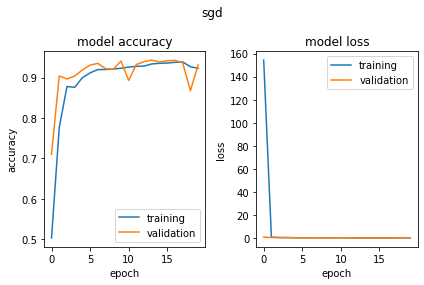

Trained in 75.48150073000001 seconds
Test loss: 0.36
Test accuracy: 0.914


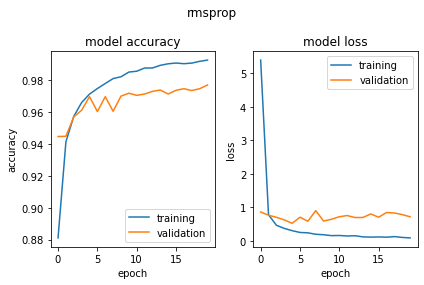

Trained in 132.016246184 seconds
Test loss: 0.949
Test accuracy: 0.973


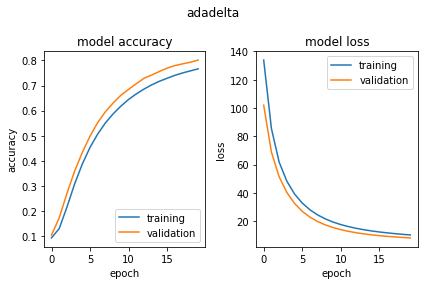

Trained in 99.32725385799998 seconds
Test loss: 9.53
Test accuracy: 0.779


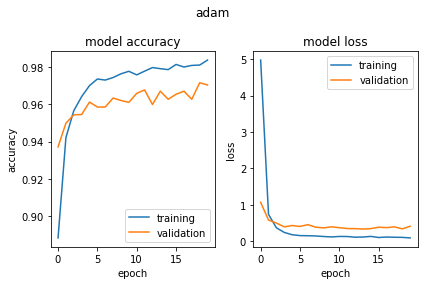

Trained in 90.543789345 seconds
Test loss: 0.478
Test accuracy: 0.965


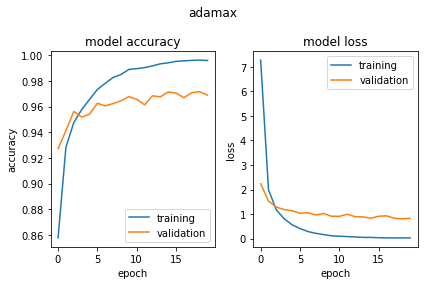

Trained in 98.10438854900002 seconds
Test loss: 0.92
Test accuracy: 0.965


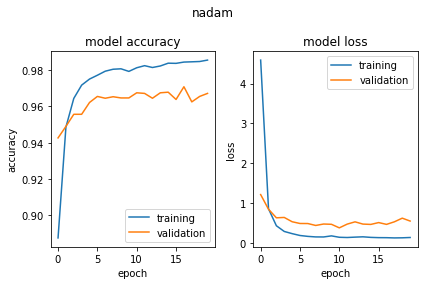

Trained in 165.48947432199998 seconds
Test loss: 0.535
Test accuracy: 0.967


In [4]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = fresh_model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

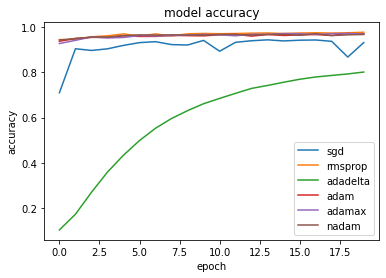

In [5]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

Note the dramatic differences between the validation accuracies! This is also a sign that this model is not excellent, otherwise more of the optimizers would work. 

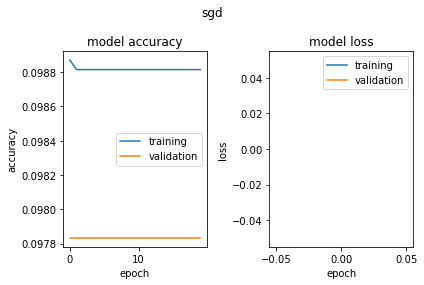

Trained in 60.682909550999966 seconds
Test loss: nan
Test accuracy: 0.098


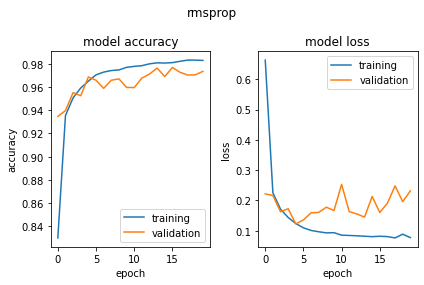

Trained in 74.59998852199999 seconds
Test loss: 0.434
Test accuracy: 0.965


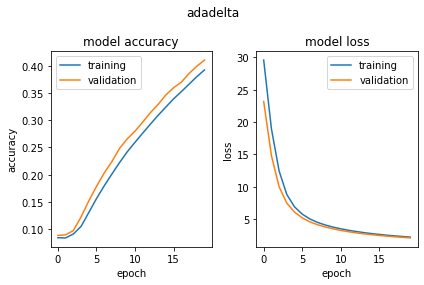

Trained in 73.216010192 seconds
Test loss: 2.19
Test accuracy: 0.396


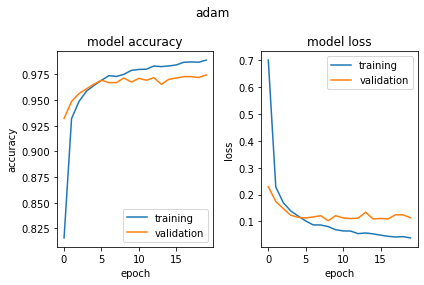

Trained in 79.61365224899998 seconds
Test loss: 0.136
Test accuracy: 0.968


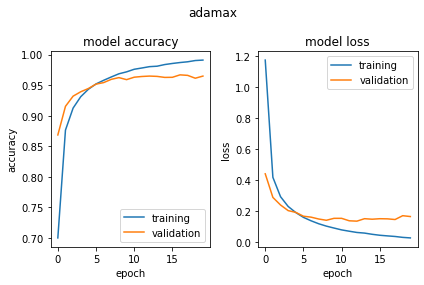

Trained in 69.01887274799992 seconds
Test loss: 0.174
Test accuracy: 0.96


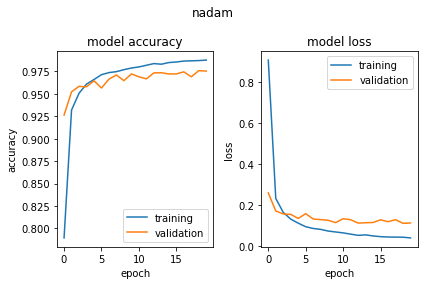

Trained in 83.16278805599995 seconds
Test loss: 0.115
Test accuracy: 0.972


In [6]:
histories = []

for optimizer in optimizers:
    model = fresh_model_2()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

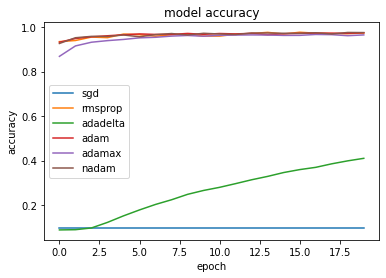

In [7]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

We can tell this model is much better, and all of the optimizers are able to achieve a 90%+ accuracy.

It's also worth noting that all of these optimizers have their own hyper-parameters that can be fined tuned even further. These paramters, such as the learning rate, can impact the size of the adjustments we make beyond the definition of these algorithms. 

The Keras documentation and ML-Cheatsheet both provide documentation on these hyper-paramters, which can be worth exploring:

* [Keras Docs](https://keras.io/optimizers/)
* [ML Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html#rmsprop)

## Micro-Exercise: Customize An Optimizer

In addition to the differeces between SGD and Adam, there are specific parameters that you can pass to each individual optimizer. Sometimes a slow learning rate, or a high momentum value can result in better training results. Using the documentation here: [https://www.tensorflow.org/api_docs/python/tf/keras/optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) import one of the optimizer classes and create a custom instance with a non-default value for one of the parameters. Then, get a new model using `fresh_model_2` and train it with your custom optimizer.

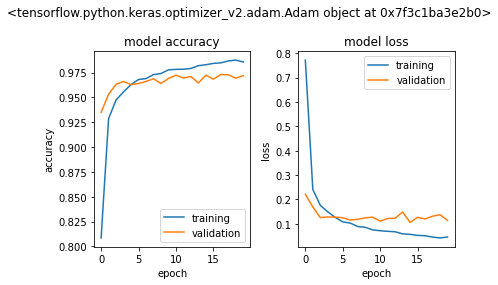

Trained in 77.74208884999985 seconds
Test loss: 0.144
Test accuracy: 0.967


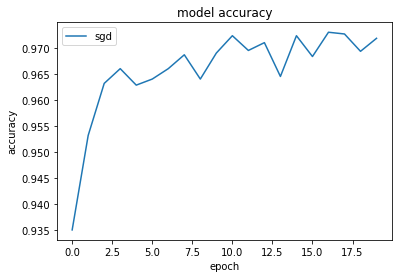

In [10]:
# Your Code Here
from tensorflow.keras.optimizers import Adam

opt = Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model = fresh_model_2()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, opt, stop - start)

plt.plot(history.history['val_accuracy'])    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()